# Fashion MNIST Classification

In [4]:
# Setup
import tensorflow as tf
import keras

import numpy as np
import datetime

import os
import sys
import imp

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import models as M
import utils as U
import dataset as D

imp.reload(M)
imp.reload(U)
imp.reload(D)

<module 'dataset' from '/Users/mghifary/Work/Code/AI/keras-poc/dataset.py'>

### Constants

In [5]:
EPOCH = 30
BATCH = 128

DATADIR = "/Users/mghifary/Work/Code/AI/data"
MODELDIR = "/Users/mghifary/Work/Code/AI/models"

### Load and preprocess dataset

In [8]:
# Load dataset
(x_train, y_train), (x_test, y_test) = D.load_data()

# Reshape
x_train = np.expand_dims(x_train, axis=-1) 
x_test = np.expand_dims(x_test, axis=-1)

(n_train, dx1, dx2, c) = x_train.shape
n_test = x_test.shape[0]

ds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
ds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Preprocess
ds_train = D.preprocess_fashionmnist(ds_train, shuffle=True, augment=False, batch_size=BATCH)
ds_test = D.preprocess_fashionmnist(ds_test, shuffle=False, augment=False, batch_size=BATCH)

### Visualize data

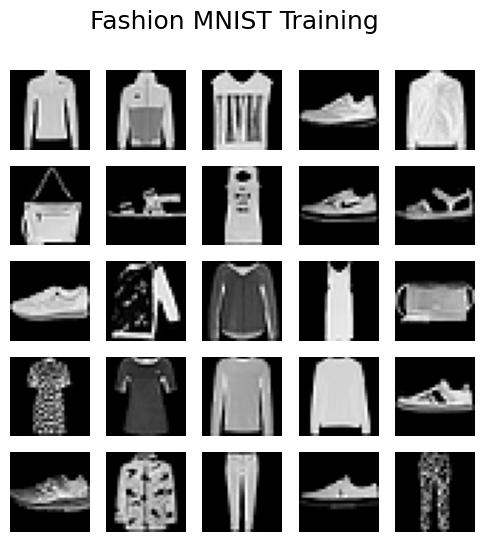

In [10]:
# Visualize training samples
U.visualize_dataset(ds_train, title="Fashion MNIST Training", n_samples=25)

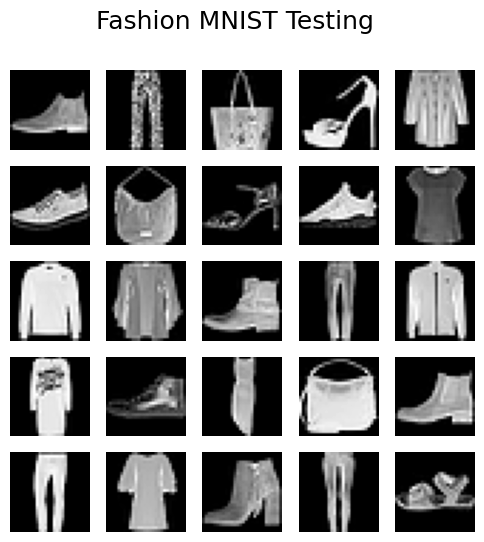

In [11]:
# Visualize test samples
U.visualize_dataset(ds_test, title="Fashion MNIST Testing", n_samples=25)

### Build NN model

In [12]:
# Sequential model
model = M.MLPSeq(num_classes=10)
model.build(input_shape=(None, dx1, dx2, c))
model.summary()


Model: "mlp_seq"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# # Functional API
# model = M.make_mlp(input_shape=(dx1, dx2, c), num_classes=10)
# model.summary()

In [8]:
# # Subclassing API
# model = M.MLP(num_classes=10)
# model.build(input_shape=(None, dx1, dx2, c))
# model.summary()

Model: "mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  200960    
                                                                 
 dense_1 (Dense)             multiple                  32896     
                                                                 
 dense_2 (Dense)             multiple                  1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Train model

In [13]:
# Loss and optimizer
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
accuracy = keras.metrics.SparseCategoricalAccuracy()
optimizer = keras.optimizers.legacy.Adam(learning_rate=3e-4)

In [14]:
# Define callback for Tensorboard and Model Checkpoint
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir="./logs/mlp-fashionmnist/" + current_time,
    update_freq="epoch"
)

checkpoint_dir = os.path.join(MODELDIR, f"mlp-fashionmnist-{current_time}")

if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

checkpoint_filepath = os.path.join(checkpoint_dir, "weights-{epoch:02d}-{val_loss:.2f}.hdf5")
modelcp_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True
)

In [15]:
# Compile and run training
model.compile(optimizer=optimizer, loss=loss_fn, metrics=[accuracy])
model.fit(ds_train, epochs=EPOCH, validation_data=ds_test, callbacks=[tensorboard_callback, modelcp_callback])

Epoch 1/30


469/469 [==============================] - 2s 3ms/step - loss: 0.6109 - sparse_categorical_accuracy: 0.7943 - val_loss: 0.4583 - val_sparse_categorical_accuracy: 0.8378
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.4070 - sparse_categorical_accuracy: 0.8569 - val_loss: 0.4083 - val_sparse_categorical_accuracy: 0.8548
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 0.3659 - sparse_categorical_accuracy: 0.8700 - val_loss: 0.4112 - val_sparse_categorical_accuracy: 0.8518
Epoch 4/30
469/469 [==============================] - 1s 3ms/step - loss: 0.3396 - sparse_categorical_accuracy: 0.8786 - val_loss: 0.3953 - val_sparse_categorical_accuracy: 0.8584
Epoch 5/30
469/469 [==============================] - 1s 3ms/step - loss: 0.3165 - sparse_categorical_accuracy: 0.8868 - val_loss: 0.3640 - val_sparse_categorical_accuracy: 0.8666
Epoch 6/30
469/469 [==============================] - 1s 3ms/step - loss: 0.3017 - sparse_categorical_accuracy: